In [1]:
import cv2
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = r"H:\DATASET\CLASSDATA\training_set\train"
save_path = r"H:\DATASET\CLASSDATA\training_set\train\image_gan"
if not os.path.exists(save_path):
    os.mkdir(save_path)

In [3]:
image_path = file_path + "\\images"
label_path = file_path + "\\labels"

In [4]:
image_path_list = glob.glob(image_path + "/*.png")
txt_path_list = glob.glob(label_path + "/*.txt")
len(image_path_list),len(txt_path_list)

(537, 537)

In [5]:
np.random.shuffle(image_path_list)

In [6]:
for i in range(0,2,4):#len(image_path_list)-1,4):
    image_list = []
    file_name = []
    context_list = []
    for j in range(4):
        index = i+j
        image = cv2.imread(image_path_list[index])
        name = image_path_list[index].split('\\')[-1][:-4]
        file_name.append(name)
        f = open(label_path+"\\{}.txt".format(name),'r')
        f.seek(0)
        context = f.readlines()
        f.close()
        offset_x = 0
        offset_y = 0
        if(j == 1):
            offset_x = 1
        elif(j == 2):
            offset_y = 1
        elif(j == 3):
            offset_x = 1
            offset_y = 1
        re_context = []
        for line in context:
            class_number,x,y,w,h  = line.replace('\n','').split(' ')
            x,y,w,h = (float(x)+offset_x)/2, (float(y)+offset_y)/2, float(w), float(h) 
            re_line = "{} {} {} {} {}\n".format(class_number, x,y,w,h)
            re_context.append(re_line)
        context_list += re_context
        image_list.append(image)
    a = np.concatenate([image_list[0],image_list[1]], axis=1)
    b = np.concatenate([image_list[2],image_list[3]], axis=1)
    concat_image = np.concatenate([a,b], axis=0)
    save_name = "".join(file_name)
    cv2.imwrite(save_path + "/"+save_name+".png",concat_image)
    f = open(save_path + '_label/'+ save_name + ".txt", 'w')
    for line in context_list:
        f.write(line)
    f.close()


In [7]:
import sys
sys.path.append("..")
from dataloader import Dataload
from utils.plot import plot_rect_old

E:\anaconda\envs\DSIM\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
file_path = glob.glob(save_path+'/*.png')

In [9]:
file_label_path = glob.glob(save_path+'_label/*.txt')

In [10]:
file_path[0],file_label_path[0]

('H:\\DATASET\\CLASSDATA\\training_set\\train\\image_gan\\793894767734.png',
 'H:\\DATASET\\CLASSDATA\\training_set\\train\\image_gan_label\\793894767734.txt')

In [11]:
image = cv2.imread(file_path[0])#image_path_list[0])#
f = open(file_label_path[0],'r') #txt_path_list[0],'r')#
d = f.readlines()
f.close()

In [12]:
coord = np.zeros((len(d),5),dtype = np.float64)

In [13]:
index = 0
for line in d:
    class_number,x,y,w,h = line.replace('\n', '').split(' ')
    #print(class_number,x,y,w,h)
    coord[index][0],coord[index][1],coord[index][2],coord[index][3],coord[index][4] = int(class_number),np.float64(x),np.float64(y),np.float64(w),np.float64(h)
    index += 1
    #coord[index][0]

In [17]:
image = cv2.resize(image,(4096,4096))
image.shape

(4096, 4096, 3)

In [19]:
coord

array([[3.        , 0.22917326, 0.11528691, 0.04483122, 0.07787777],
       [3.        , 0.4894339 , 0.10467143, 0.04156997, 0.03541584],
       [2.        , 0.67807885, 0.15468935, 0.0241737 , 0.03275811],
       [2.        , 0.67533184, 0.18342996, 0.0281294 , 0.03770273],
       [3.        , 0.27642185, 0.78680343, 0.04571027, 0.05068236],
       [5.        , 0.83166233, 0.74081421, 0.05164931, 0.0604248 ],
       [5.        , 0.78467882, 0.84091187, 0.04947917, 0.06896973]])

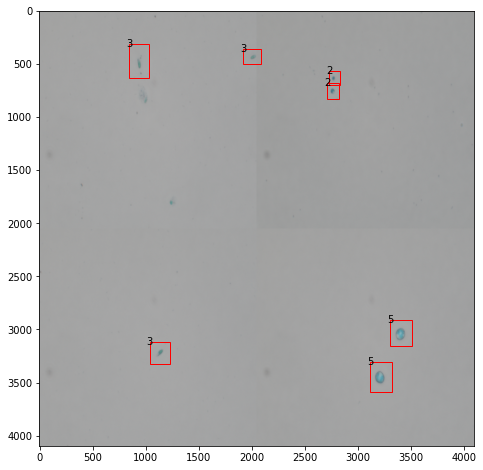

In [18]:
plot_rect_old(image,coord)

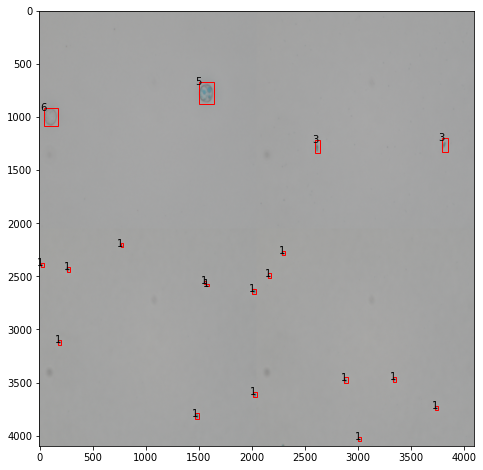

In [296]:
plot_rect_old(image,coord)

In [265]:
def plot_rect_old(image, label):
    plt.figure(figsize=(8,8))
    plt.imshow(image)
    if(len(image.shape) == 3):
        width,height,channel = image.shape
    else:
        width,height = image.shape
        
    for coord in label:
        class_number, x,y,w,h= coord 
        centerx = width*(x - w/2)
        centery = height*(y - h/2)
        W = w * width
        H = h * height
        plt.gca().add_patch(
            plt.Rectangle(
                xy=(centerx,centery),
                width=W, 
                height=H,
                edgecolor='red',
                fill=False, linewidth=1
            )
        )
        plt.text(centerx, centery, '{}'.format(int(class_number)), ha='center', va='center')
    return 

In [223]:
0.376 * 4000

1504.0